Installing Necessary Packages

In [ ]:
# Install Faker package

!pip install faker
from faker import Faker

# Install Pandas package

!pip install pandas
import pandas as pd

Dataset creation

In [48]:
# Synthetic dataset creation

import random

# Initialize Faker
fake = Faker("en_IN")  # Indian locale for realistic data

# Function to generate synthetic data
def generate_indian_bank_data(n=100000):
    data = []
    for _ in range(n):
        # Generate customer demographics
        customer_id = fake.uuid4()
        name = fake.name()
        email_id = fake.email()
        age = random.randint(18, 70)
        income = round(random.uniform(200000, 3000000), 2)  # Annual income in INR

        # Generate credit details
        credit_score = round(random.uniform(300, 900), 2)  # Credit score range

        # Generate loan details
        loan_amount = round(random.uniform(50000, 5000000), 2)  # Loan amount in INR
        interest_rate = round(random.uniform(5, 15), 2)  # Interest rate in percentage
        loan_term = random.choice([12, 24, 36, 60, 120, 240])  # Loan term in months

        # Generate repayment status
        if income < 500000 and credit_score < 600:
            repayment_status = 1  # Default
        else:
            repayment_status = 0  # No default

        # Additional parameters
        city = fake.city()
        state = fake.state()
        account_open_date = fake.date_between(start_date="-10y", end_date="today")
        last_transaction_date = fake.date_between(start_date="-1y", end_date="today")

        # Add to dataset
        customer = {
            "Customer_ID": customer_id,
            "Name": name,
            "Email_ID": email_id,
            "Age": age,
            "Income": income,
            "Credit_Score": credit_score,
            "Loan_Amount": loan_amount,
            "Interest_Rate": interest_rate,
            "Loan_Term_Months": loan_term,
            "Repayment_Status": repayment_status,
            "City": city,
            "State": state,
            "Account_Open_Date": account_open_date,
            "Last_Transaction_Date": last_transaction_date,
        }
        data.append(customer)

    # Create DataFrame
    return pd.DataFrame(data)

# Generate the dataset
indian_bank_data = generate_indian_bank_data(n=100000)

# Save to CSV
indian_bank_data.to_csv("indian_bank_details.csv", index=False)


In [49]:
# Read the dataset

df = pd.read_csv(r"/content/indian_bank_details.csv")
df

,Customer_ID,Name,Email_ID,Age,Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term_Months,Repayment_Status,City,State,Account_Open_Date,Last_Transaction_Date
0,de739c28-fd7d-488c-854b-7c63c4fd6fac,Neha Deshmukh,rajagopalanaadi@example.org,28,552789.06,748.33,4398278.94,10.98,120,0,Aizawl,Andhra Pradesh,2017-01-14,2024-04-06
1,4c6dae5a-90f2-443f-ad59-c311b4adf85c,Laban Natt,tristan34@example.com,70,1884906.25,613.01,4295154.85,10.51,36,0,Avadi,Uttarakhand,2017-01-27,2024-04-22
2,75469eab-8ee1-4eaf-83ee-01d0c7ab96f9,Udant Toor,hnayak@example.net,38,1414750.12,355.29,2415250.74,10.71,24,0,Kolkata,Jharkhand,2024-09-09,2024-05-20
3,58d16fc8-7b70-4076-965a-9ebcff73c5af,Tripti Swamy,gunbirwali@example.com,62,251914.50,685.27,2102132.43,10.24,24,0,Malda,Sikkim,2020-03-07,2024-02-12
4,eaa7d29a-ebdc-43b9-ab8b-53d0291f3342,Ekani Warrior,qnazareth@example.com,29,1354081.55,642.34,1100430.45,7.09,240,0,Unnao,Goa,2015-09-11,2024-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3a33c151-66be-4485-b498-3a86f672056d,Aradhana Bains,dnagarajan@example.com,65,2269927.64,458.13,1995635.77,10.69,24,0,Kurnool,Telangana,2022-12-29,2024-06-17
99996,ff6069d6-1ebd-4db1-aaa6-4a1ad6d91a46,Siya Mammen,pratyush12@example.org,53,1964674.78,755.05,4201247.93,12.38,60,0,Kakinada,Karnataka,2018-11-18,2024-04-02
99997,0f24518f-fe58-445c-992a-8e88b46be4ea,Imaran Chakrabarti,swaminathanpriya@example.org,50,1085179.90,890.31,1643462.43,13.60,12,0,Durg,Manipur,2020-02-09,2024-08-02
99998,7b0c6a05-2452-4d8c-a0b4-8ba9b4caac3b,Isaac Nath,janaki91@example.org,27,1195261.43,387.32,3805512.82,11.28,24,0,Kolkata,Mizoram,2017-10-26,2024-10-30


Data Cleaning process

In [ ]:
# looking for NaN values

df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Name,0
Email_ID,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Interest_Rate,0
Loan_Term_Months,0
Repayment_Status,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer_ID            100000 non-null  object 
 1   Name                   100000 non-null  object 
 2   Email_ID               100000 non-null  object 
 3   Age                    100000 non-null  int64  
 4   Income                 100000 non-null  float64
 5   Credit_Score           100000 non-null  float64
 6   Loan_Amount            100000 non-null  float64
 7   Interest_Rate          100000 non-null  float64
 8   Loan_Term_Months       100000 non-null  int64  
 9   Repayment_Status       100000 non-null  int64  
 10  City                   100000 non-null  object 
 11  State                  100000 non-null  object 
 12  Account_Open_Date      100000 non-null  object 
 13  Last_Transaction_Date  100000 non-null  object 
dtypes: float64(4), int64(3), object(7)
me

Package Installation

In [51]:
# Missingno package installation

!pip install missingno
import missingno as msno

# Matplotlib package installation

!pip install matplotlib
import matplotlib.pyplot as plt

# Seaborn package installation

!pip install seaborn
import seaborn as sns

EDA

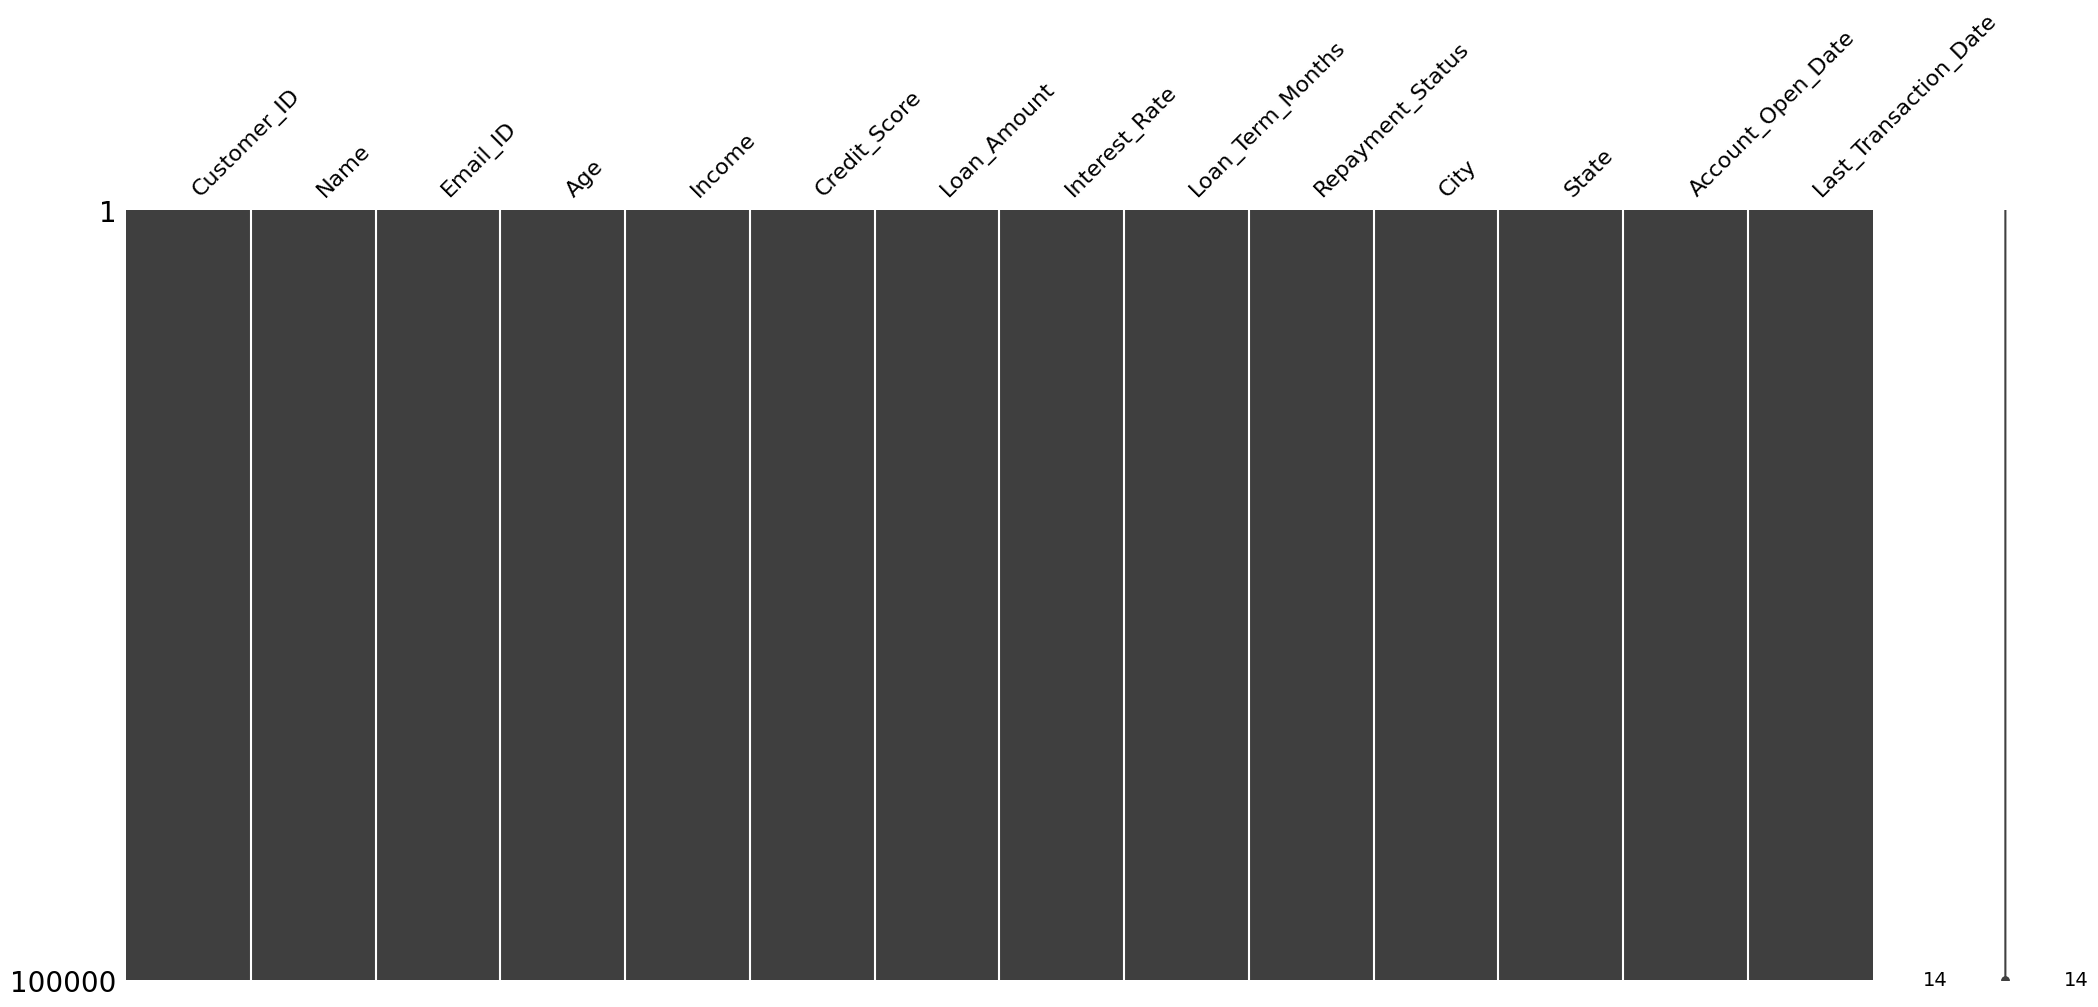

In [ ]:
msno.matrix(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


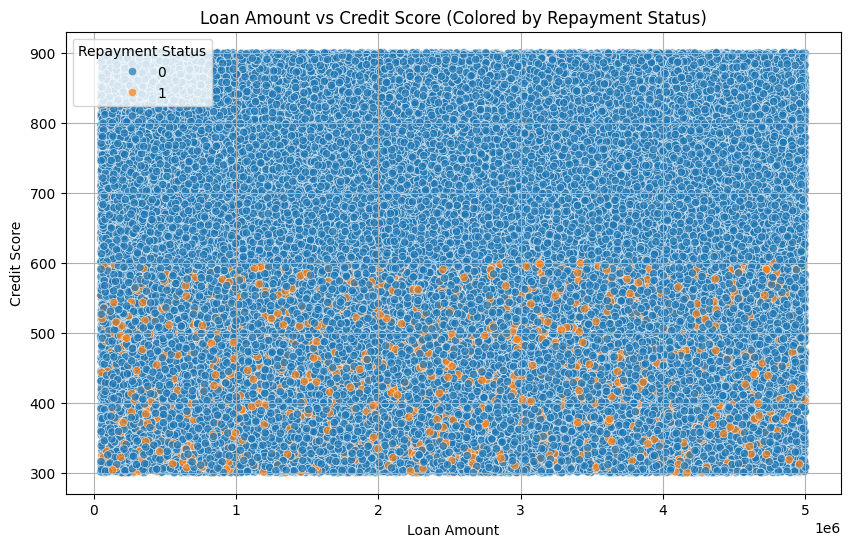

In [52]:
# Scatter Plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Loan_Amount', y='Credit_Score', hue='Repayment_Status', alpha=0.7)
plt.title("Loan Amount vs Credit Score (Colored by Repayment Status)")
plt.xlabel("Loan Amount")
plt.ylabel("Credit Score")
plt.legend(title="Repayment Status")
plt.grid(True)
plt.show()

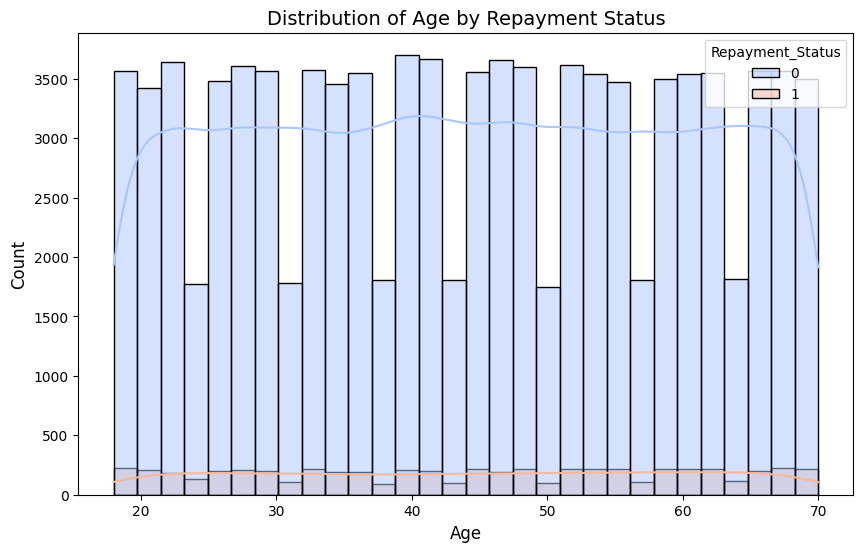

In [58]:
# Histogram to compare Age distribution for default vs no default
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Repayment_Status', kde=True, palette='coolwarm', bins=30)

# Add title and labels
plt.title('Distribution of Age by Repayment Status', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


<ipython-input-62-10ff847698d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Repayment_Status', y='Income', data=mean_income, palette='coolwarm')


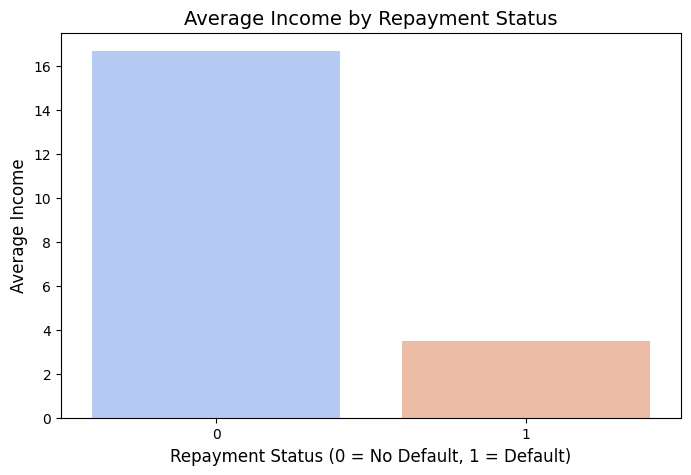

In [62]:
# Calculate mean income for each repayment status
mean_income = df.groupby('Repayment_Status')['Income'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Repayment_Status', y='Income', data=mean_income, palette='coolwarm')

# Add title and labels
plt.title('Average Income by Repayment Status', fontsize=14)
plt.xlabel('Repayment Status (0 = No Default, 1 = Default)', fontsize=12)
plt.ylabel('Average Income', fontsize=12)

# Show the plot
plt.show()


Preprocessing

In [ ]:
df.shape

(100000, 14)

In [ ]:
# Missing values finding

df.isnull().sum()

,0
Customer_ID,0
Name,0
Email_ID,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Interest_Rate,0
Loan_Term_Months,0
Repayment_Status,0


In [ ]:
# Duplicates

df.duplicated().sum()

0

Feature scaling

In [61]:
# Feature scaling

df['Income'] = df['Income'] / 100000
df['Loan_Amount'] = df['Loan_Amount'] / 100000
df['Credit_Score'] = df['Credit_Score'] / 10
df

,Customer_ID,Name,Email_ID,Age,Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term_Months,Repayment_Status,City,State,Account_Open_Date,Last_Transaction_Date
0,de739c28-fd7d-488c-854b-7c63c4fd6fac,Neha Deshmukh,rajagopalanaadi@example.org,28,5.527891,74.833,43.982789,10.98,120,0,Aizawl,Andhra Pradesh,2017-01-14,2024-04-06
1,4c6dae5a-90f2-443f-ad59-c311b4adf85c,Laban Natt,tristan34@example.com,70,18.849062,61.301,42.951548,10.51,36,0,Avadi,Uttarakhand,2017-01-27,2024-04-22
2,75469eab-8ee1-4eaf-83ee-01d0c7ab96f9,Udant Toor,hnayak@example.net,38,14.147501,35.529,24.152507,10.71,24,0,Kolkata,Jharkhand,2024-09-09,2024-05-20
3,58d16fc8-7b70-4076-965a-9ebcff73c5af,Tripti Swamy,gunbirwali@example.com,62,2.519145,68.527,21.021324,10.24,24,0,Malda,Sikkim,2020-03-07,2024-02-12
4,eaa7d29a-ebdc-43b9-ab8b-53d0291f3342,Ekani Warrior,qnazareth@example.com,29,13.540816,64.234,11.004304,7.09,240,0,Unnao,Goa,2015-09-11,2024-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3a33c151-66be-4485-b498-3a86f672056d,Aradhana Bains,dnagarajan@example.com,65,22.699276,45.813,19.956358,10.69,24,0,Kurnool,Telangana,2022-12-29,2024-06-17
99996,ff6069d6-1ebd-4db1-aaa6-4a1ad6d91a46,Siya Mammen,pratyush12@example.org,53,19.646748,75.505,42.012479,12.38,60,0,Kakinada,Karnataka,2018-11-18,2024-04-02
99997,0f24518f-fe58-445c-992a-8e88b46be4ea,Imaran Chakrabarti,swaminathanpriya@example.org,50,10.851799,89.031,16.434624,13.60,12,0,Durg,Manipur,2020-02-09,2024-08-02
99998,7b0c6a05-2452-4d8c-a0b4-8ba9b4caac3b,Isaac Nath,janaki91@example.org,27,11.952614,38.732,38.055128,11.28,24,0,Kolkata,Mizoram,2017-10-26,2024-10-30


Balancing Data

In [ ]:
# Balancing data using oversampling technique

df['Repayment_Status'].value_counts()

,count
Repayment_Status,
0,94681
1,5319


In [ ]:
# Import packages

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [ ]:
# Feature Selection
feature = df[['Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term_Months', 'Age', 'Interest_Rate']]
feature.head()

,Income,Credit_Score,Loan_Amount,Loan_Term_Months,Age,Interest_Rate
0,3.410304,37.586,48.129729,12,61,10.25
1,4.730369,60.461,14.479167,240,25,10.13
2,13.344211,83.756,32.694569,12,66,11.28
3,29.376926,66.127,25.332060,120,65,13.15
4,21.459359,68.998,29.777137,60,19,10.62


In [ ]:
# Target Selection
target = df['Repayment_Status']
target.head()

,Repayment_Status
0,1
1,0
2,0
3,0
4,0


In [ ]:
# Oversampling using smote

smote = SMOTE(sampling_strategy='auto', random_state=42)

f_res, t_res = smote.fit_resample(feature, target)

In [ ]:
t_res.value_counts()

,count
Repayment_Status,
1,94681
0,94681


Train and Test data

In [ ]:
# Spliting the train and test data

!pip install scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
# Standard scalar Installation

from sklearn.preprocessing import StandardScaler

f_train, f_test, t_train, t_test = train_test_split(f_res, t_res, test_size=0.3, random_state=42)

scaler = StandardScaler()

f_train = scaler.fit_transform(f_train)

f_test = scaler.transform(f_test)

Algorithm Selection & Prediciton

In [ ]:
# Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

model= LogisticRegression()

model.fit(f_train, t_train)

pred = model.predict(f_test)

Accuracy: 97.75%

Confusion Matrix:
[[27520   979]
 [  302 28008]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28499
           1       0.97      0.99      0.98     28310

    accuracy                           0.98     56809
   macro avg       0.98      0.98      0.98     56809
weighted avg       0.98      0.98      0.98     56809


Classification Report: 0.9963540287451013


Model Evaluation & Accuracy Check

In [ ]:
# Accuracy Check

accuracy = accuracy_score(t_test, pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(t_test, pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(t_test, pred))

# Calculate ROC-AUC Score
prob = model.predict_proba(f_test)[:, 1]  # Get probability of class 1
roc_auc = roc_auc_score(t_test, prob)
print(f"\nClassification Report: {roc_auc}")

Eligible Customers

In [67]:
# Predict repayment status for all users
scaled_features = scaler.transform(feature)  # Scale the features in the dataset
df['Predicted_Repayment_Status'] = model.predict(scaled_features)  # Add predicted status to DataFrame

# Separate eligible and non-eligible users
eligible_users = df[df['Predicted_Repayment_Status'] == 0]  # Repayment_Status = 0 (No Default)

# Display a summary
print(f"Number of eligible users: {len(eligible_users)}")

# Display top 10 eligible users
print("\nEligible Users (Top 10):")
eligible_users[['Customer_ID', 'Name', 'Email_ID', 'Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term_Months', 'Interest_Rate', 'City', 'State']].head(10)

Number of eligible users: 91523

Eligible Users (Top 10):


,Customer_ID,Name,Email_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term_Months,Interest_Rate,City,State
1,4c6dae5a-90f2-443f-ad59-c311b4adf85c,Laban Natt,tristan34@example.com,70,18.849062,61.301,42.951548,36,10.51,Avadi,Uttarakhand
2,75469eab-8ee1-4eaf-83ee-01d0c7ab96f9,Udant Toor,hnayak@example.net,38,14.147501,35.529,24.152507,24,10.71,Kolkata,Jharkhand
3,58d16fc8-7b70-4076-965a-9ebcff73c5af,Tripti Swamy,gunbirwali@example.com,62,2.519145,68.527,21.021324,24,10.24,Malda,Sikkim
4,eaa7d29a-ebdc-43b9-ab8b-53d0291f3342,Ekani Warrior,qnazareth@example.com,29,13.540816,64.234,11.004304,240,7.09,Unnao,Goa
5,597094e0-55ad-4ce7-b460-b6623cc3546d,Kiaan Majumdar,harshildhillon@example.org,20,23.688694,82.234,4.173134,60,6.07,Firozabad,Mizoram
6,f20176ff-404d-4fec-a471-2f8ec8a3b702,Advika Barman,patrick11@example.net,34,2.881219,38.082,39.826646,36,9.30,Motihari,Arunachal Pradesh
7,d1e7c42f-b122-4071-9533-7994e4eee575,Teerth Mitra,urvashiarora@example.com,42,10.467714,81.958,45.098726,36,11.67,Durgapur,Meghalaya
9,530153f2-5236-448c-b4f9-ba8ee5cc8505,Reyansh Kala,aradhanapalla@example.org,48,24.579987,57.703,13.084874,36,10.03,Vellore,Goa
10,ebb6aef2-0e37-4987-8304-b97294cf3ee6,Baghyawati Comar,balvan10@example.net,31,22.957948,41.926,42.977124,12,10.81,Machilipatnam,Punjab
11,5b8bc97c-6a40-4833-80e6-c863ae5ac08b,Chasmum Arora,hemadalal@example.org,20,8.513307,69.919,47.384254,24,9.88,Nanded,Nagaland


Non Eligible Customers

In [68]:
# Predict repayment status for all users
scaled_features = scaler.transform(feature)  # Scale the features in the dataset
df['Predicted_Repayment_Status'] = model.predict(scaled_features)  # Add predicted status to DataFrame

# Separate eligible and non-eligible users
non_eligible_users = df[df['Predicted_Repayment_Status'] == 1]  # Repayment_Status = 1 (Default)

# Display a summary
print(f"Number of non-eligible users: {len(non_eligible_users)}")

# Display top 10 non-eligible users
print("\nNon-Eligible Users (Top 10):")
non_eligible_users[['Customer_ID', 'Name', 'Email_ID', 'Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term_Months', 'Interest_Rate', 'City', 'State']].head(10)


Number of non-eligible users: 8477

Non-Eligible Users (Top 10):


,Customer_ID,Name,Email_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term_Months,Interest_Rate,City,State
0,de739c28-fd7d-488c-854b-7c63c4fd6fac,Neha Deshmukh,rajagopalanaadi@example.org,28,5.527891,74.833,43.982789,120,10.98,Aizawl,Andhra Pradesh
8,daf0e918-10b7-4a9c-9ecd-7ba0ccc9e7ce,Inaya Reddy,jayaramanrishi@example.com,36,16.277024,82.869,10.682244,12,11.27,Bhiwani,Haryana
17,342c95e6-ff93-4fe9-a470-4be4988939e9,Anamika Samra,tchar@example.com,36,3.048465,37.125,17.117520,36,12.76,North Dumdum,Gujarat
21,fb7d22c5-abb1-4b64-81a1-136228d14aff,Saanvi Sami,ethanbains@example.com,45,11.408213,50.970,18.525573,60,13.87,Gwalior,Maharashtra
22,e2f91180-4da2-48de-b8d2-4f480575becf,Ijaya Chaudhary,samaksh17@example.com,37,15.470740,35.022,9.060671,12,7.25,Ichalkaranji,Punjab
29,64e2d654-04f4-47d4-95dd-aff70e456b43,Nidra Parsa,tsaha@example.com,23,20.050826,45.781,14.821406,12,9.05,Jalandhar,Kerala
46,3e94dc74-21c2-4d82-8581-b7035bd2d9e5,Warhi Gaba,jasmitkurian@example.net,39,2.011353,49.633,33.145930,240,9.95,Bahraich,Karnataka
48,cb004015-cc0d-4cc2-bc9e-fef65e823beb,Idika Bhalla,utella@example.com,30,8.847384,46.040,40.495345,12,9.10,Mangalore,Odisha
59,2b64bdb5-e1f9-4ce7-b6c0-c8afc4ed2afd,Falguni Lad,xkaul@example.net,65,22.503472,82.687,4.760287,240,10.97,Mahbubnagar,Maharashtra
63,d4ed88bd-3bd2-4ac3-adde-4e18fbbb6b1e,Vaishnavi Bhatti,priyahari@example.net,33,5.160230,35.965,25.749396,36,14.01,Hosur,Uttar Pradesh


Dump the Code

In [69]:
import joblib

# Save the trained logistic regression model
model_filename = "loan_prediction_model.pkl"
joblib.dump(model, model_filename)
print(f"Model saved as '{model_filename}'.")

Model saved as 'loan_prediction_model.pkl'.
